参考：<br>
python量化分析系列之---使用python获取股票历史数据和实时分笔数据 https://blog.csdn.net/wolf1132/article/details/78606945<br>
Tushare官网:http://tushare.waditu.com/trading.html<br>
Python股票数据分析(tushare/seaborn) https://www.jianshu.com/p/bf9c20ef160e<br>
pandas.Series.plot https://blog.csdn.net/ranwei693532/article/details/79934986<br>

In [1]:
import tushare as ts
import matplotlib.pyplot as plt
import datetime

# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
 
# Control the default size of figures in this Jupyter notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#获取实时分笔数据
df = ts.get_realtime_quotes('000848') #Single stock symbol
print(type(df))
df[['code','name','price','bid','ask','volume','amount','time']]

<class 'pandas.core.frame.DataFrame'>


,code,name,price,bid,ask,volume,amount,time
0,000848,承德露露,7.860,7.850,7.860,2268917,17841056.190,14:08:45


In [3]:
df1 = ts.get_hist_data('000848',start='2019-01-01',end='2019-01-15')
df2=df1.sort_index(ascending=True) #按索引（此处为date）升序
df2

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2019-01-02,8.08,8.11,8.08,7.96,41247.06,0.04,0.50,7.928,7.869,7.968,38976.54,36498.86,38864.14
2019-01-03,8.01,8.10,7.91,7.89,40544.64,-0.17,-2.10,7.948,7.864,7.952,42313.16,37093.68,38517.77
2019-01-04,7.88,7.98,7.90,7.12,65003.71,-0.01,-0.13,7.964,7.878,7.938,50290.27,39638.12,39708.99
2019-01-07,7.94,7.97,7.91,7.84,57989.99,0.01,0.13,7.968,7.886,7.929,52258.49,42005.79,40643.43
2019-01-08,7.91,7.96,7.95,7.88,31820.57,0.04,0.51,7.950,7.911,7.925,47321.19,41745.39,40347.98
2019-01-09,7.95,8.10,8.00,7.89,71659.56,0.05,0.63,7.934,7.931,7.925,53403.69,46190.12,42630.34
2019-01-10,7.98,7.98,7.84,7.80,44316.84,-0.16,-2.00,7.920,7.934,7.924,54158.13,48235.65,42617.30
2019-01-11,7.84,7.89,7.83,7.77,24531.73,-0.01,-0.13,7.906,7.935,7.910,46063.74,48177.01,40792.60
2019-01-14,7.85,7.85,7.78,7.74,28247.06,-0.05,-0.64,7.880,7.924,7.893,40115.15,46186.82,40047.76


In [4]:
def format_date(date_list):
    '''将2019-01-15这样的日期字串转为01-15这样的日期字串'''
    for d in date_list:
        #先转换为时间,然后转换为其他格式 
        timeStruct = time.strptime(d, "%Y-%m-%d") 
        strTime = time.strftime("%m/%d", timeStruct) 
        yield strTime

([<matplotlib.axis.XTick at 0xcad51122b0>,
 <a list of 10 Text xticklabel objects>)

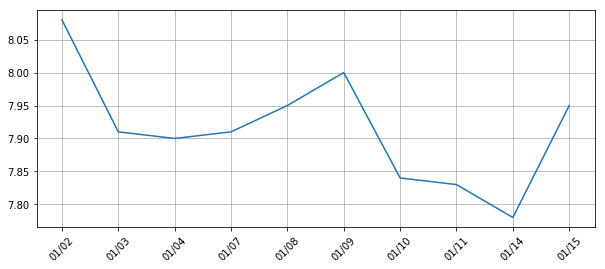

In [5]:
#df2['close'].plot(legend=True ,figsize=(10,4), grid=True) #通过figsize参数可以指定绘图对象的宽度和高度，单位为英寸；
                                                                            #dpi参数指定绘图对象的分辨率，即每英寸多少个像素，缺省值为80。                      
date_list=df2.index.tolist()
x=np.arange(len(date_list))
y=df2['close']
plt.figure(figsize=(10,4))
plt.plot(x,y)
plt.grid()
#设置x轴可读标记（将刻度索引与刻度标记对应起来），旋转45度
plt.xticks(x,format_date(date_list),rotation=45) 

In [6]:
end = datetime.datetime.today() #开始时间结束时间，选取最近一年的数据
start = datetime.datetime(end.year-1,end.month,end.day)
end = str(end)[0:10]
start = str(start)[0:10]
stock1 = ts.get_hist_data('000848',start,end)#选取一支股票
stock2 =stock1.sort_index(ascending=True)
stock2.head(10)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2018-01-17,10.36,10.42,10.33,10.04,95243.20,-0.01,-0.10,10.258,9.962,9.577,121915.70,116392.00,85161.26
2018-01-18,10.29,10.43,10.27,10.17,74056.75,-0.06,-0.58,10.266,10.046,9.642,110053.67,118763.28,87027.48
2018-01-19,10.23,10.48,10.31,10.10,105702.48,0.04,0.39,10.280,10.130,9.704,106168.92,118835.67,90565.94
2018-01-22,10.31,10.54,10.46,10.26,108020.55,0.15,1.46,10.342,10.229,9.777,99038.76,120544.50,93789.00
2018-01-23,10.46,10.51,10.35,10.29,53040.92,-0.11,-1.05,10.344,10.267,9.845,87212.78,106170.74,94701.86
2018-01-24,10.29,10.34,10.10,10.02,87964.58,-0.25,-2.42,10.298,10.278,9.891,85757.06,103836.38,95812.27
2018-01-25,10.13,10.39,10.26,10.12,78471.62,0.16,1.58,10.296,10.281,9.948,86640.03,98346.85,97033.93
2018-01-26,10.26,10.37,10.30,10.20,46784.64,0.04,0.39,10.294,10.287,9.995,74856.46,90512.69,95598.30
2018-01-29,10.31,10.35,10.16,10.12,59958.32,-0.14,-1.36,10.234,10.288,10.030,65244.02,82141.39,95520.42


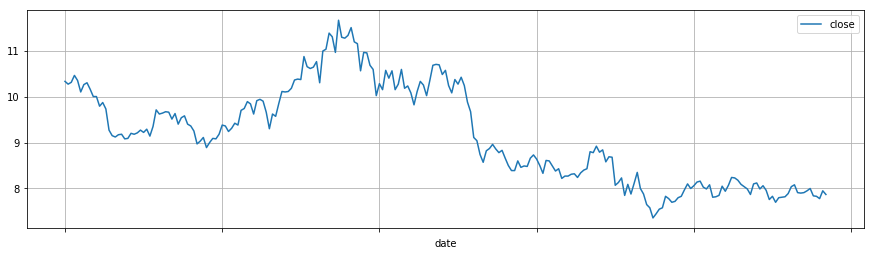

In [7]:
stock2['close'].plot(legend=True ,figsize=(15,4),grid=True)

可以做出5日均线、10日均线以及20日均线

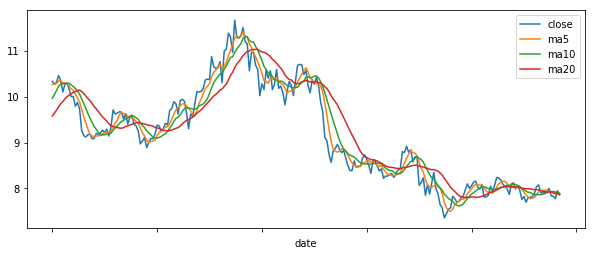

In [8]:
stock2[['close','ma5','ma10','ma20']].plot(legend=True ,figsize=(10,4))